In [1]:
import lightkurve as lk

/Users/kabathpetr/anaconda3/lib/python3.11/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/kabathpetr/.lightkurve/cache. Please move all the files in the legacy directory /Users/kabathpetr/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [2]:
search_result = lk.search_targetpixelfile('TOI-503', mission='TESS')
# searching for all available data for TOI-503 from the TESS mission

In [3]:
search_result
# print the result of the search of all available data for TOI-503 from the TESS mission 

SearchResult containing 15 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 07 2019      SPOC     120   186812530      0.0
  1 TESS Sector 07 2019 TESS-SPOC    1800   186812530      0.0
  2 TESS Sector 34 2021      SPOC      20   186812530      0.0
  3 TESS Sector 34 2021      SPOC     120   186812530      0.0
  4 TESS Sector 34 2021 TESS-SPOC     600   186812530      0.0
  5 TESS Sector 44 2021      SPOC     120   186812530      0.0
  6 TESS Sector 44 2021 TESS-SPOC     600   186812530      0.0
  7 TESS Sector 45 2021      SPOC     120   186812530      0.0
  8 TESS Sector 45 2021 TESS-SPOC     600   186812530      0.0
  9 TESS Sector 46 2021      SPOC     120   186812530      0.0
 10 TESS Sector 46 2021 TESS-SPOC     600   186812530      0.0
 11 TESS Sector 71 2023      SPOC     120   186812530      0.0
 12 TESS Sector 71 2023 TESS-SPOC     200   186812530      0.0
 13 TESS Sector 72 2023      SPOC     120   186812530      0.0
 14 TESS Sector 72 2023 TESS-SPOC     200   186812530      0.0

/Users/kabathpetr/anaconda3/lib/python3.11/site-packages/lightkurve/search.py:423: LightkurveWarning: Warning: 15 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


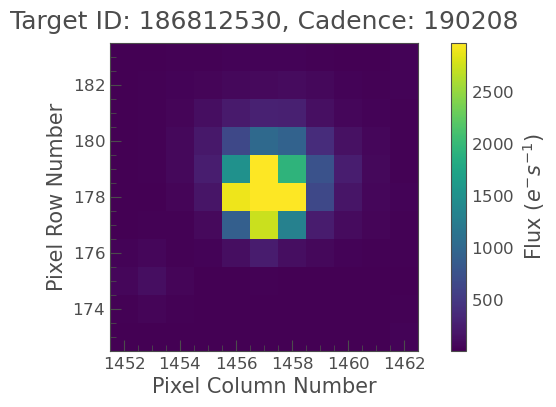

In [4]:
from lightkurve import search_targetpixelfile
#pixelfile = search_targetpixelfile("KIC 8462852", quarter=16).download();

pixelfile = lk.search_targetpixelfile('TOI-503', mission='TESS')#.download();
pixelfile.table["dataURL"]=pixelfile.table["dataURI"]

tes = pixelfile.download()
tes.plot(frame=1);

#searching the TPF file for TOI-503 Brown dwarf


In [5]:
tpf = search_result.download()

/Users/kabathpetr/anaconda3/lib/python3.11/site-packages/lightkurve/search.py:423: LightkurveWarning: Warning: 15 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


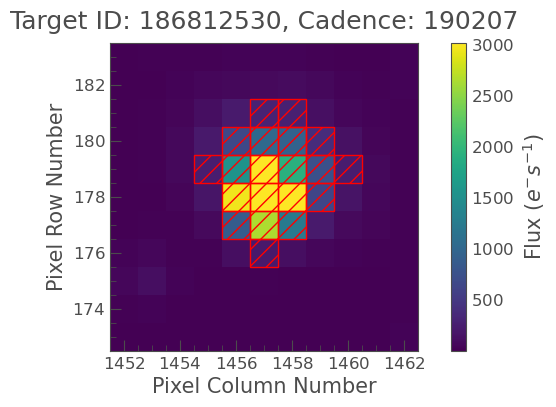

In [23]:
%matplotlib inline
tes.plot(aperture_mask=tes.pipeline_mask);

# defining the apertures

In [6]:
lc = tes.to_lightcurve()

In [7]:
lc.errorbar();

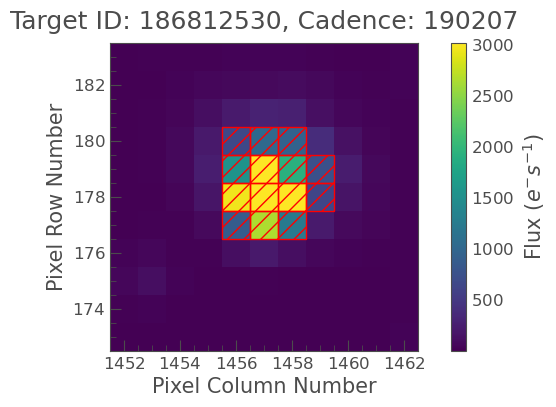

In [26]:
aperture_mask = tes.create_threshold_mask(threshold=10)

# Plot that aperture
tes.plot(aperture_mask=aperture_mask);

In [27]:
lc = tes.to_lightcurve(aperture_mask=aperture_mask)

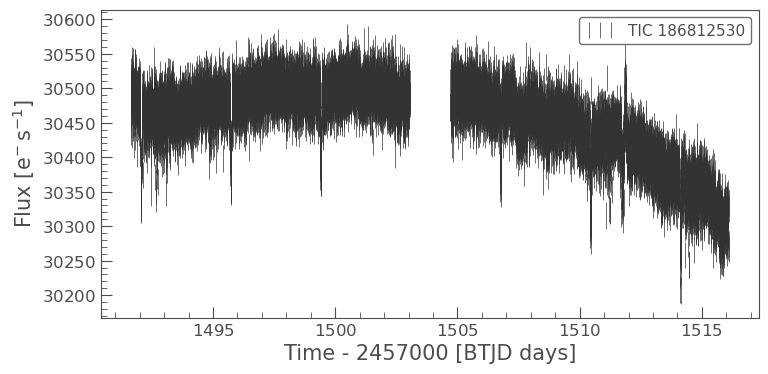

In [28]:
lc.errorbar();
#plotting the choosen aperture light curve

In [8]:
flat_lc = lc.flatten(window_length=1001)
flat_lc.errorbar();

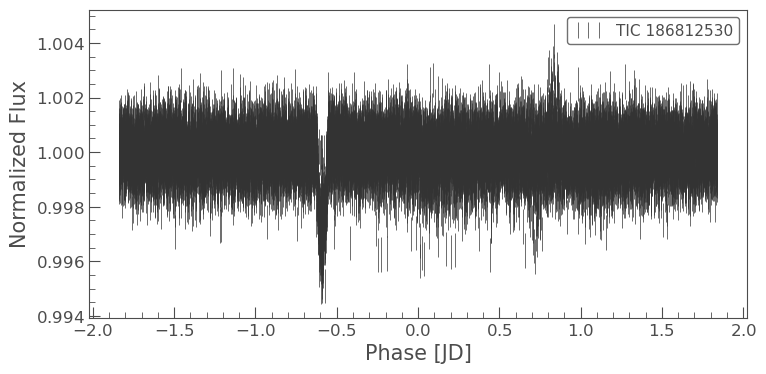

In [30]:
folded_lc = flat_lc.fold(period=3.6772, epoch_time=1500.0)
folded_lc.errorbar();

In [9]:
import astropy.units as u
binned_lc = folded_lc.bin(time_bin_size=1*u.minute)
binned_lc.errorbar();

NameError: name 'folded_lc' is not defined

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

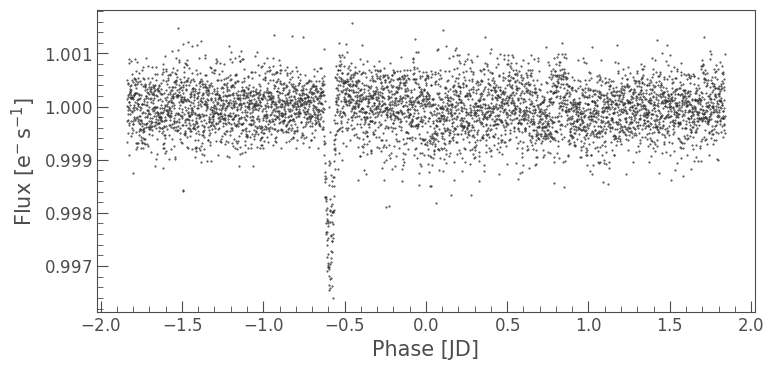

In [24]:
binned_lc.scatter(s=0.9)